# K-means Clustering

In [ ]:
# Based on the data make different cluster to describe which is our target people

In [19]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv(r'Mall_Customers.csv',index_col=0)

In [8]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
data.shape

(200, 4)

In [9]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#values get stores as float which is used but K means algo does not take int64 as valid entry
data['Gender'] = data.Gender.map({'Female':0,'Male':1})

In [11]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [12]:
data.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [16]:
X = data.values[:,[2,3]] #all the rows and gender and age columns are not that much required the other two column are imp that is we are taking here 

Text(0, 0.5, 'WSSE')

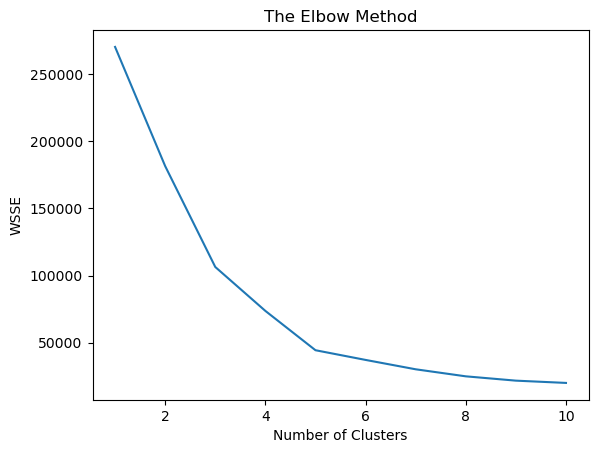

In [20]:
from sklearn.cluster import KMeans


wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)  # Function to convert variable into values
plt.plot(range(1,11),wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WSSE")

In [24]:
kmeans = KMeans(n_clusters=5,random_state=10)
Y_pred = kmeans.fit_predict(X)

In [25]:
Y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [26]:
data['clusters'] = Y_pred
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,2
3,0,20,16,6,4
4,0,23,16,77,2
5,0,31,17,40,4
6,0,22,17,76,2
7,0,35,18,6,4
8,0,23,18,94,2
9,1,64,19,3,4


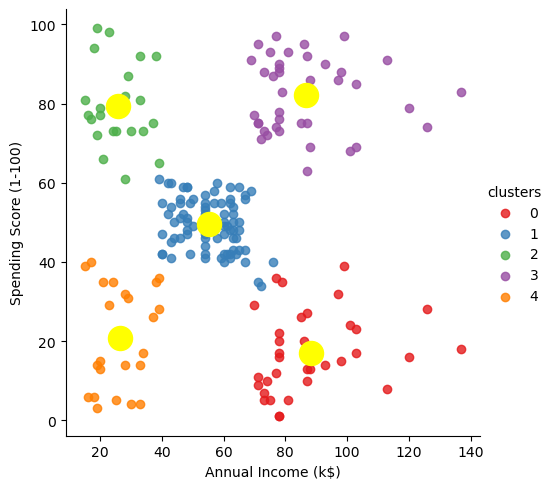

In [30]:
sns.lmplot(data=data,x = 'Annual Income (k$)',y = 'Spending Score (1-100)',fit_reg=False,hue="clusters",palette='Set1')                 #NO Regression line
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow")
plt.show()

In [31]:
data['clusters'] = data.clusters.map({0:'standard',1:'sensible',2:'Target',3:'careless',4:'careful'})

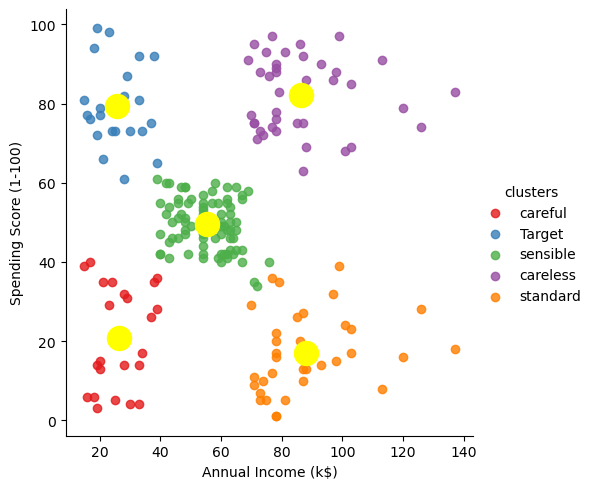

In [38]:
sns.lmplot(data=data,x = 'Annual Income (k$)',y = 'Spending Score (1-100)',fit_reg=False,hue="clusters",palette='Set1')                 #NO Regression line
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow")
plt.show()

In [40]:
data_new = data[data['clusters']=='Target']

In [43]:
data_new

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
2,1,21,15,81,Target
4,0,23,16,77,Target
6,0,22,17,76,Target
8,0,23,18,94,Target
10,0,30,19,72,Target
12,0,35,19,99,Target
14,0,24,20,77,Target
16,1,22,20,79,Target
18,1,20,21,66,Target


In [42]:
data_new.shape

(22, 5)

In [44]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,1,19,15,39,careful
2,1,21,15,81,Target
3,0,20,16,6,careful
4,0,23,16,77,Target
5,0,31,17,40,careful
...,...,...,...,...,...
196,0,35,120,79,careless
197,0,45,126,28,standard
198,1,32,126,74,careless


In [48]:
data_new['Gender'] = data.Gender.map({0:'Female',1:'Male'})

In [54]:
data_new.to_excel('Target Data.xlsx',index = True)